### Loading the model

In [2]:
import cobra
from cobra.io import read_sbml_model
model = read_sbml_model('C:/Users/User/Downloads/e_coli_core.xml')

### Running the model with FBA

In [6]:
# Understanding the objective expression

model.objective.expression

1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5

In [7]:
# Simulation using flux balance analysis

model.optimize()

# output is an optimal solution for the objective function - Gain in Biomass
# Fluxes and reduced costs with respect to each reaction
# Reduced cost - derivatives of the objective function with respect to a reaction - how much the change of a reaction will affect the objective function

,fluxes,reduced_costs
PFK,7.477382,0.000000e+00
PFL,0.000000,-1.527746e-02
PGI,4.860861,0.000000e+00
PGK,-16.023526,-0.000000e+00
PGL,4.959985,5.854692e-18
...,...,...
NADH16,38.534610,8.673617e-19
NADTRHD,0.000000,-2.546243e-03
NH4t,4.765319,-3.665630e-17
O2t,21.799493,1.742080e-18


In [9]:
# Assigning the FBA solution to an object

solution = model.optimize()
print(solution)

<Solution 0.874 at 0x22dd55ce208>


In [14]:
# Investigating the attributes of the solution object

print(solution.objective_value) # The value of the optimal solution of the objective function
print(solution.status) # Outcome of the linear programming optimization
print(solution.fluxes) #  rate at which metabolites are converted from one form to another in a given reaction
print(solution.shadow_prices) # derivatives of the objective function with respect to flux of a metabolite - value of an additional unit of a resource (or constraint) in the context of the objective function

0.873921506968431
optimal
PFK         7.477382
PFL         0.000000
PGI         4.860861
PGK       -16.023526
PGL         4.959985
             ...    
NADH16     38.534610
NADTRHD     0.000000
NH4t        4.765319
O2t        21.799493
PDH         9.282533
Name: fluxes, Length: 95, dtype: float64
glc__D_e   -0.091665
gln__L_c   -0.075114
gln__L_e   -0.070022
glu__L_c   -0.070022
glu__L_e   -0.068749
              ...   
fru_e      -0.091665
fum_c      -0.048379
fum_e      -0.045832
g3p_c      -0.052198
g6p_c      -0.098030
Name: shadow_prices, Length: 72, dtype: float64


### Analyzing FBA Solutions

In [18]:
# using summary methods - information on the input and output behavior of the model, along with the optimized objective

model.summary()

# C-Number ; C-Flux - C stands for carbon

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


In [23]:
# Inspecting the behaviour of individual metabolites using summary methods

model.metabolites.glc__D_e.summary()

Percent,Flux,Reaction,Definition
100.00%,10,EX_glc__D_e,glc__D_e <=>
Percent,Flux,Reaction,Definition
100.00%,-10,GLCpts,glc__D_e + pep_c --> g6p_c + pyr_c


In [24]:
model.metabolites.atp_c.summary()

Percent,Flux,Reaction,Definition
66.58%,45.51,ATPS4r,adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c
23.44%,16.02,PGK,3pg_c + atp_c <=> 13dpg_c + adp_c
2.57%,1.758,PYK,adp_c + h_c + pep_c --> atp_c + pyr_c
7.41%,5.064,SUCOAS,atp_c + coa_c + succ_c <=> adp_c + pi_c + succoa_c
Percent,Flux,Reaction,Definition
12.27%,-8.39,ATPM,atp_c + h2o_c --> adp_c + h_c + pi_c
76.46%,-52.27,BIOMASS_Ecoli_core_w_GAM,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
0.33%,-0.2235,GLNS,atp_c + glu__L_c + nh4_c --> adp_c + gln__L_c + h_c + pi_c
10.94%,-7.477,PFK,atp_c + f6p_c --> adp_c + fdp_c + h_c


### Production Envelopes - phenotype phase planes

- show distinct phases of optimal growth with different use of two different substrates

In [34]:
# phenotype phase plane to evaluate uptakes of Glucose and Oxygen

from cobra.flux_analysis import production_envelope

#temporarily setting the objective to produce acetate 
prod_env = production_envelope(model,["EX_o2_e"],objective='EX_ac_e',carbon_sources="EX_glc__D_e")
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc__D_e,0.0,0.0,0.0,0.000000,1.181048e-14,1.161225e-14,-60.000000
1,EX_glc__D_e,0.0,0.0,0.0,1.578947,5.263158e-02,5.174819e-02,-56.842105
2,EX_glc__D_e,0.0,0.0,0.0,3.157895,1.052632e-01,1.034964e-01,-53.684211
3,EX_glc__D_e,0.0,0.0,0.0,4.736842,1.578947e-01,1.552446e-01,-50.526316
4,EX_glc__D_e,0.0,0.0,0.0,6.315789,2.105263e-01,2.069927e-01,-47.368421


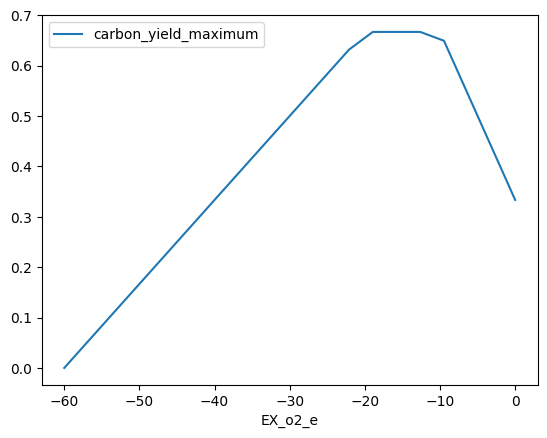

In [35]:
%matplotlib inline
prod_env.plot(
    kind='line', x='EX_o2_e', y='carbon_yield_maximum');